# Baseline and simplified model

In [1]:
import matplotlib.pyplot as plt

In [2]:
# According to research
lambda_P = 6.80157379e-01
k_PQ = 4.17370748e-01
k_QpP = 0.00000001e+00
delta_Qp = 6.78279483e-01
gamma_P = 5.74025981e+00
gamma_Q = 1.34300000e+00
KDE = 9.51318080e-02
K = 1.60140838e+02

# According to Ribba paper
# lambda_P = 0.121
# k_PQ = 0.0295
# k_QpP = 0.0031
# delta_Qp = 0.00867
# gamma_P = 0.729
# gamma_Q = 0.729
# KDE = 0.24
# K = 100


In [3]:
# Starting values
# NOTE: after calibration

# Proliferative cells initial population - according to research
P0 = 4.7279
# Quiescent cells initial population - according to research
Q0 = 48.5147
# Damaged quiescent cells - 0 as we start before any treatments
Qp0 = 0
# Drug dose - arbitrary number - should be set to 1 at the start of each cycle
C0 = 1

y0 = P0, Q0, Qp0, C0
y0_simple = P0, C0

In [4]:
import numpy as np
from Models import RibbyOdeModel, RibbySimplifiedOdeModel

# Task 1

In [5]:
consts = (KDE, lambda_P, K, k_QpP, k_PQ, gamma_P, gamma_Q, delta_Qp)

In [6]:
time_range = np.linspace(0, 100, 100)
import therapy
from therapy_display import plot_therapy, plot_simple_therapy

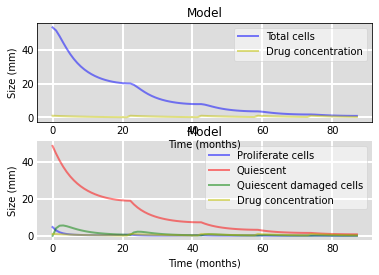

In [7]:
ribby_model = RibbyOdeModel(consts)
treatment_results = therapy.gliomas_therapy(ribby_model, time_range, y0, consts)
plot_therapy(treatment_results)

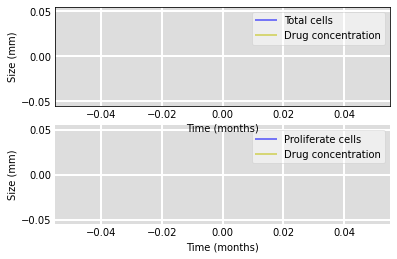

In [8]:
ribby_simple_model = RibbySimplifiedOdeModel(consts)
treatment_results = therapy.gliomas_simple_therapy(ribby_simple_model, time_range, y0_simple, consts)
plot_simple_therapy(treatment_results)

# Task 2

In [9]:
from sensitivity_analysis import SensitivityAnalisys

In [44]:
analyzer = SensitivityAnalisys(RibbyOdeModel, y0, np.linspace(0, 50, 50))

In [47]:
def analyze_for_parameter(analzyzer, consts, parameter, type="normal"):
    import pandas as pd
    if type == "normal":
        print(type)
        analyses = analyzer.analyze(consts, parameter, 2 ** 10)
    else:
        analyses = analyzer.analyze_simple(consts, parameter, 2 ** 10)
    
    # skip the first analysis as it contains Nans
    sts = [Si[0] for Si in analyses][1:]
    
    sts = [st.sort_values(by=["ST"], ascending=False).head(10) for st in sts]
    
    return pd.concat(sts).groupby(level=0).mean().sort_values(by=["ST"], ascending=False).head(10)


## Analysis for ALL (baseline)

In case of `ALL` the model value being tested is the total size of a tumor represented by **P\* = P + Q + Qp**

In [48]:
ALL_analysis = analyze_for_parameter(analyzer, consts, "ALL")
print(ALL_analysis)

normal


/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:199: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:212: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)


                    ST       ST_conf
lambda_P  4.103420e-01  3.431750e-02
k_PQ      1.934019e-01  1.809524e-02
gamma_Q   1.652459e-01  1.414051e-02
KDE       1.389044e-01  1.158192e-02
gamma_P   6.663421e-02  6.456765e-03
K         2.553589e-02  2.426971e-03
delta_Qp  1.048551e-02  9.356192e-04
k_QpP     1.203756e-15  1.183711e-16


## Analysis for P (baseline)

In [13]:
P_analysis = analyze_for_parameter(analyzer, consts, "P")
print(P_analysis)

/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:124: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


                ST   ST_conf
lambda_P  0.507721  0.045701
k_PQ      0.353889  0.034438
KDE       0.140722  0.012807
gamma_P   0.112269  0.011142


## Analysis for Q (baseline)

In [14]:
Q_analysis = analyze_for_parameter(analyzer, consts, "Q")
print(Q_analysis)

/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:199: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:212: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)


                ST   ST_conf
gamma_Q   0.415989  0.034612
lambda_P  0.397962  0.033137
KDE       0.318305  0.026372
k_PQ      0.258390  0.024314


## Analysis for Qp (baseline)

In [15]:
Qp_analysis = analyze_for_parameter(analyzer, consts, "Qp")
print(Qp_analysis)

/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:124: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


                ST   ST_conf
delta_Qp  0.466821  0.036613
lambda_P  0.318857  0.028476
KDE       0.209146  0.018953
k_PQ      0.195843  0.018880


## Analyzis for C (baseline)

In [16]:
C_analysis = analyze_for_parameter(analyzer, consts, "C")
print(C_analysis)

/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:124: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


                    ST       ST_conf
KDE       9.994265e-01  6.009108e-02
lambda_P  2.021830e-16  2.289295e-17
k_PQ      1.174301e-16  1.339806e-17
delta_Qp  7.542421e-17  1.030455e-17


## Analysis for P and C (simplified)

In [17]:
analyzer = SensitivityAnalisys(RibbySimplifiedOdeModel, y0_simple, np.linspace(0, 50, 50))
consts_simple = (lambda_P, gamma_P, KDE, K)

In [18]:
P_analysis = analyze_for_parameter(analyzer, consts_simple, "P", "simple")
print(P_analysis)

/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:199: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:212: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)


                ST   ST_conf
K         0.678823  0.042579
lambda_P  0.203535  0.016669
gamma_P   0.080715  0.006968
KDE       0.037422  0.003279


In [19]:
C_analysis = analyze_for_parameter(analyzer, consts_simple, "C", "simple")
print(C_analysis)

/Users/jakub/.asdf/installs/python/3.9.9/lib/python3.9/site-packages/SALib/analyze/sobol.py:124: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


                    ST       ST_conf
KDE       9.999915e-01  6.156017e-02
lambda_P  1.590809e-12  1.701338e-13
gamma_P   1.307615e-12  1.714725e-13
K         1.239204e-12  1.779185e-13


## Modified sensitive models vs baseline

In [20]:

def plot_models_parameter(model_labels, results, idx, label):
    results = [result[idx] for result in results]
    
    size = len(results[0])
    t = np.linspace(0, size, size)

    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(212, facecolor='#dddddd', axisbelow=True)
    ax.set_title(label)
    
    for model_label, result, color in zip(model_labels, results, ['b', 'r', 'g', 'y']):
        ax.plot(t, result, color, alpha=0.5, lw=2, label=model_label)
        
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Value')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()
    

3 most senstivie parameters are: lambda_P, KDE, gamma_Q

In [21]:
baseline_consts = consts
# model 1
model1_consts = (0.98 * KDE, 1.03 * lambda_P, K, k_QpP, k_PQ, gamma_P, 1.01 * gamma_Q, delta_Qp)
# model 2
model2_consts = (1.02 * KDE, 1.03 * lambda_P, K, k_QpP, k_PQ, gamma_P, 1.05 * gamma_Q, delta_Qp)
# model 3
model3_consts = (1.05 * KDE, 0.97 * lambda_P, K, k_QpP, k_PQ, gamma_P, 0.92 * gamma_Q, delta_Qp)

sensitive_models_consts = [baseline_consts, model1_consts, model2_consts, model3_consts]
sensitive_models_labels = ["Baseline", "Model 1", "Model 2", "Model 3"]

sensitive_models_results = []

for model_consts in sensitive_models_consts:
    model = RibbyOdeModel(model_consts)
    results = model.compute(y0, time_range)
    sensitive_models_results.append(results)

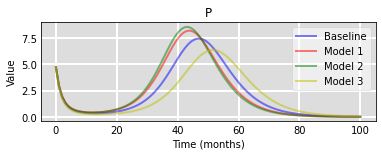

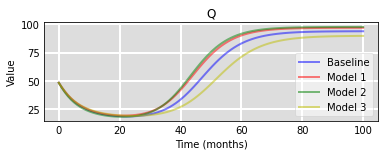

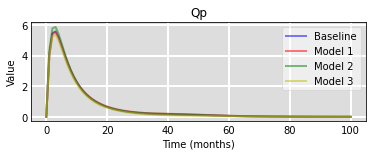

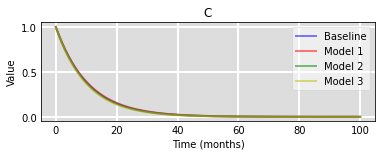

In [22]:
#for model_name, results in zip(sensitive_models_labels, sensitive_models_results):
#    plot_therapy(results, model_name)

for idx, label in enumerate(["P", "Q", "Qp", "C"]): 
    plot_models_parameter(sensitive_models_labels, sensitive_models_results, idx, label)

## Modified insensitive models vs baseline

In [81]:
# model 1
model1_consts = (KDE, lambda_P, K, k_QpP, k_PQ, gamma_P, gamma_Q, 10. * delta_Qp)
# model 2
model2_consts = (KDE, lambda_P, K, 10. * k_QpP, k_PQ, gamma_P, gamma_Q, delta_Qp)
# model 3
model3_consts = (KDE, lambda_P,  K, k_QpP, k_PQ, 1.5 * gamma_P, gamma_Q, delta_Qp)

insensitive_models_consts = [baseline_consts, model1_consts, model2_consts, model3_consts]
insensitive_models_labels = ["Baseline", "Model 1", "Model 2", "Model 3"]

insensitive_models_results = []

for model_consts in insensitive_models_consts:
    model = RibbyOdeModel(model_consts)
    results = model.compute(y0, time_range)
    insensitive_models_results.append(results)

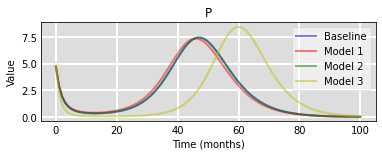

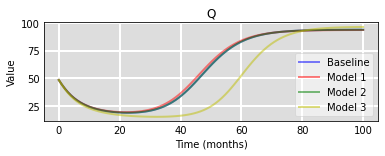

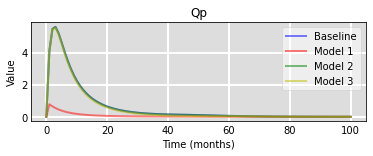

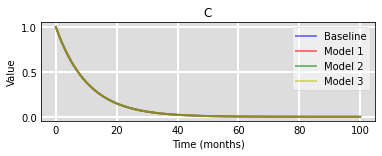

In [82]:
for idx, label in enumerate(["P", "Q", "Qp", "C"]): 
    plot_models_parameter(insensitive_models_labels, insensitive_models_results, idx, label)

## Cooperative model

In [25]:
def compute_cooperative_model(models, initial_parameters, time_series):
    results = []
    for model in models:
        results.append(model.compute(initial_parameters, time_series))
    
    return np.mean(results, axis=0)
                    
    

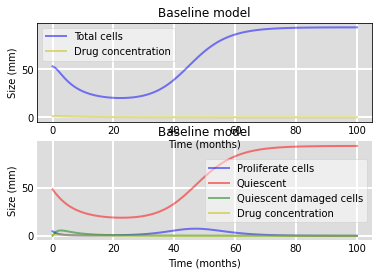

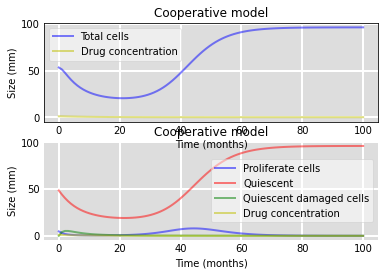

In [39]:
sensitive_models = sensitive_models_consts[1:3]
insensitive_model = insensitive_models_consts[1]

models_consts = sensitive_models
models_consts.append(insensitive_model)

cooperateive_models = [RibbyOdeModel(coop) for coop in models_consts]

baseline_results = RibbyOdeModel(consts).compute(y0, time_range)
plot_therapy(baseline_results, "Baseline model")
cooperative_results = compute_cooperative_model(cooperateive_models, y0, time_range)
plot_therapy(cooperative_results, "Cooperative model")

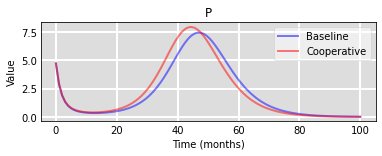

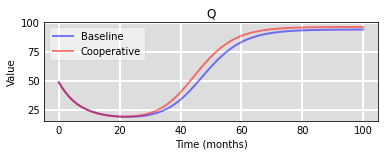

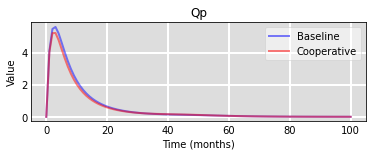

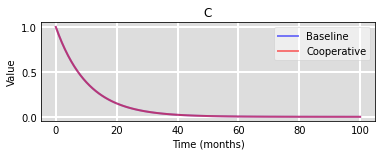

In [40]:

for idx, label in enumerate(["P", "Q", "Qp", "C"]): 
    plot_models_parameter(["Baseline", "Cooperative"], [baseline_results, cooperative_results], idx, label)